[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


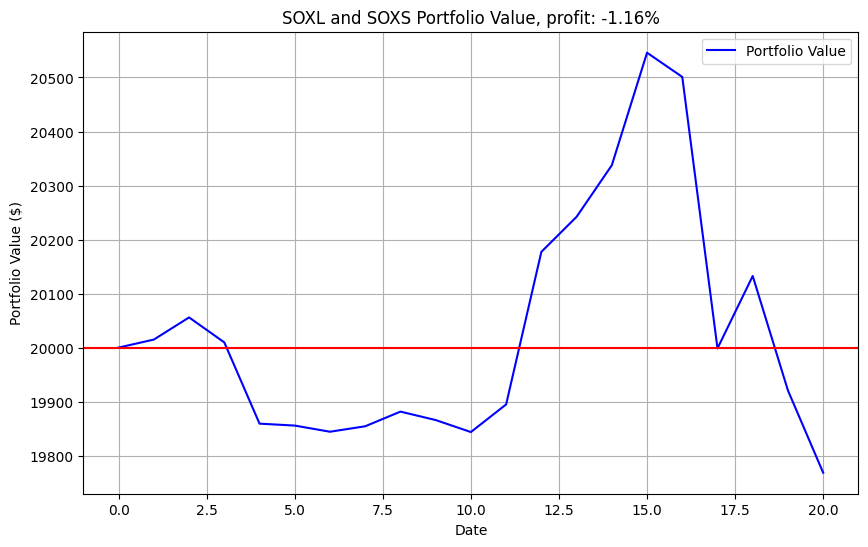

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

def strategy_3x_hedge(bull_symbol, bear_symbol, start_date, end_date, initial_investment, balance):
    # Download historical data
    bull_data = yf.download(bull_symbol, start=start_date, end=end_date)
    bear_data = yf.download(bear_symbol, start=start_date, end=end_date)

    # Calculate shares bought for TQQQ and SQQQ
    bull_shares = initial_investment / bull_data['Close'].iloc[0]
    bear_shares = initial_investment / bear_data['Close'].iloc[0]

    bull_value = bull_shares * bull_data['Close'].iloc[0]
    bear_value = bear_shares * bear_data['Close'].iloc[0]

    portfolio_value = bull_value + bear_value

    # Calculate portfolio value
    adjust_money = []
    portfolio_values = []
    portfolio_values.append(portfolio_value)

    # Adjust portfolio if 5% above previous value
    for i in range(1, len(bull_data)):
        if bull_data['Close'].iloc[i] * bull_shares + bear_data['Close'].iloc[i] * bear_shares > balance * portfolio_value:
            # Buy the lower part to equalize TQQQ and SQQQ values
            if bull_data['Close'].iloc[i] * bull_shares > bear_data['Close'].iloc[i] * bear_shares:
                gap = bull_data['Close'].iloc[i] * bull_shares - bear_data['Close'].iloc[i] * bear_shares
                bear_shares += gap / bear_data['Close'].iloc[i]
                adjust_money.append(gap)
            else:
                gap = bear_data['Close'].iloc[i] * bear_shares - bull_data['Close'].iloc[i] * bull_shares
                bull_shares += gap / bull_data['Close'].iloc[i]
                adjust_money.append(gap)
            portfolio_value = bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i]
        portfolio_values.append(bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i])

    cost = sum(adjust_money) + initial_investment * 2
    profit = (bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i] - cost)/cost

    # Plot the portfolio value over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(portfolio_values)), portfolio_values, label='Portfolio Value', color='b')
    plt.axhline(y=cost, color='r', linestyle='-')
    #plt.text(0, 0, f'profit: {profit * 100}:.2f%', fontsize=12, color='red')

    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.title(f'{bull_symbol} and {bear_symbol} Portfolio Value, profit: {profit * 100:.2f}%')
    plt.grid(True)
    plt.legend()
    plt.show()


strategy_3x_hedge('SOXL', 'SOXS', '2024-1-2', '2024-02-01', 10000, 2)